In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

fatal: destination path 'insightbook.opencv_project_python' already exists and is not an empty directory.


In [ ]:
%cd /content/insightbook.opencv_project_python/07.segmentation

/content/insightbook.opencv_project_python/07.segmentation


## 문제 아래 컨투어 예제, 허프 선 예제, 확률적 허프선 예제 그리고 트랙바 예제를 notebook에서 실행해 보고 트랙바에서 컨투어, 허프 선, 확률적 허프선의 인자를 변경하도록 수정해 주세요

In [ ]:
!python cntr_hierarchy.py

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

# 영상 읽기
img = cv2.imread('../img/shapes_donut.png')

# 트랙바를 위한 윈도우 생성
cv2.namedWindow('Trackbars')
cv2.createTrackbar('Threshold', 'Trackbars', 127, 255, nothing)

while True:
    img_copy = img.copy()
    img2_copy = img.copy()

    # 트랙바로부터 임계값 가져오기
    threshold_value = cv2.getTrackbarPos('Threshold', 'Trackbars')

    # 바이너리 이미지로 변환
    imgray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    ret, imthres = cv2.threshold(imgray, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # 가장 바깥 컨투어만 수집
    contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]

    # 모든 컨투어를 트리 계층으로 수집
    contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    # 가장 바깥 컨투어만 그리기
    cv2.drawContours(img_copy, contour, -1, (0, 255, 0), 3)

    # 모든 컨투어 그리기
    for idx, cont in enumerate(contour2):
        # 랜덤한 컬러 추출
        color = [int(i) for i in np.random.randint(0, 255, 3)]
        # 컨투어 인덱스마다 랜덤한 색상으로 그리기
        cv2.drawContours(img2_copy, contour2, idx, color, 3)
        # 컨투어 첫 좌표에 인덱스 숫자 표시
        cv2.putText(img2_copy, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

    # 화면 출력
    cv2.imshow('RETR_EXTERNAL', img_copy)
    cv2.imshow('RETR_TREE', img2_copy)

    # ESC를 누르면 종료
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


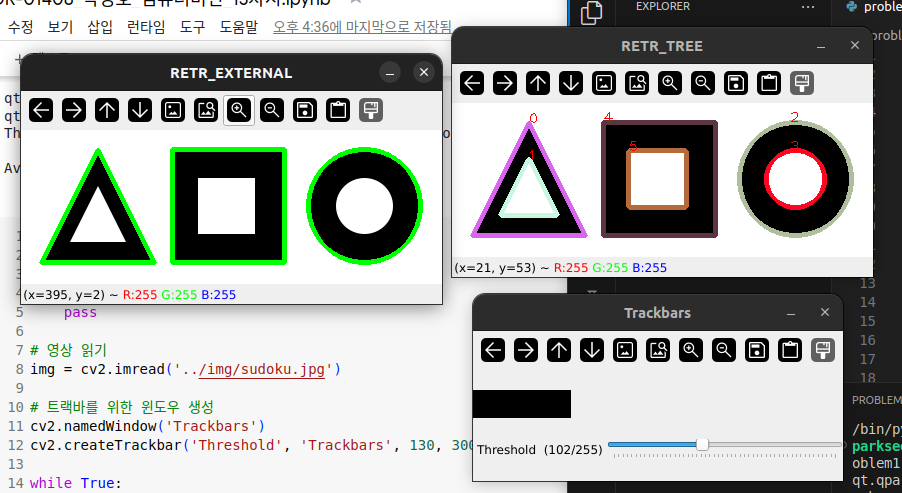

### 7.2.1 허프 선 변환

이미지는 수많은 픽셀로 구성되어 있습니다. 그 픽셀 중 서로 직선 관계를 갖는 픽셀들만 골라내는 것이 허프 선 변환의 핵심입니다. OpenCV에서는 허프 변환을 위해 아래와 같은 함수를 제공합니다.



`lines = cv2.HoughLines(img, rho, theta, threshold, lines, srn=0, stn=0, min_theta, max_theta)`
- img: 입력 이미지, 1 채널 바이너리 스케일
- rho: 거리 측정 해상도, 0~1
- theta: 각도, 라디안 단위 (np.pi/0~180)
- threshold: 직선으로 판단할 최소한의 동일 개수 (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
- lines: 검출 결과, N x 1 x 2 배열 (r, Θ)
- srn, stn: 멀티 스케일 허프 변환에 사용, 선 검출에서는 사용 안 함
- min_theta, max_theta: 검출을 위해 사용할 최대, 최소 각도

거리와 각도를 얼마나 세밀하게 계산할 것인지를 rho와 theta 파라미터로 조정할 수 있습니다.

threshold는 같은 직선에 몇 개의 점이 등장해야 직선으로 판단할지를 나타내는 최소한의 개수를 말합니다.

아래는 직선을 검출하고 기준 좌표에 빨간 점을 찍은 예시입니다.

In [ ]:
!python hough_line.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

# 영상 읽기
img = cv2.imread('../img/sudoku.jpg')

# 트랙바를 위한 윈도우 생성
cv2.namedWindow('Trackbars')
cv2.createTrackbar('Threshold', 'Trackbars', 130, 300, nothing)

while True:
    img2 = img.copy()
    h, w = img.shape[:2]

    # 트랙바로부터 임계값 가져오기
    threshold_value = cv2.getTrackbarPos('Threshold', 'Trackbars')

    # 그레이 스케일 변환 및 엣지 검출
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgray, 100, 200)

    # 허프 선 검출
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold_value)
    if lines is not None:
        for line in lines:  # 검출된 모든 선 순회
            r, theta = line[0]  # 거리와 각도
            tx, ty = np.cos(theta), np.sin(theta)  # x, y축에 대한 삼각비
            x0, y0 = tx * r, ty * r  # x, y 기준(절편) 좌표

            # 기준 좌표에 빨강색 점 그리기
            cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0, 0, 255), -1)

            # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
            x1, y1 = int(x0 + w * (-ty)), int(y0 + h * tx)
            x2, y2 = int(x0 - w * (-ty)), int(y0 - h * tx)

            # 선그리기
            cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # 결과 출력
    merged = np.hstack((img, img2))
    cv2.imshow('Hough Lines', merged)

    # ESC를 누르면 종료
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


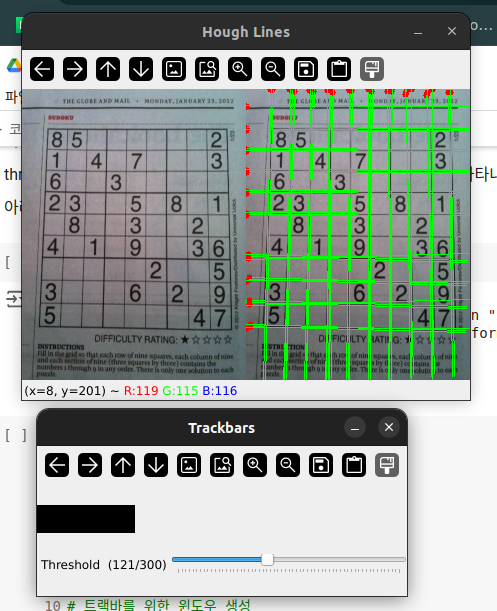

우선 캐니 엣지로 경계값을 검출한 뒤 허프 선 검출을 했습니다.

### 7.2.2 확률적 허프 선 변환

허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다.

이를 개선하기 위한 방법이 확률적 허프 선 변환입니다.

이는 모든 점을 고려하지 않고 무작위로 선정한 픽셀에 대해 허프 변환을 수행하고 점차 그 수를 증가시키는 방법입니다.

다음의 함수로 확률적 허프 선 변환을 수행할 수 있습니다.


`lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)`
- minLineLength(optional): 선으로 인정할 최소 길이
- maxLineGap(optional): 선으로 판단할 최대 간격
- lines: 검출된 선 좌표, N x 1 x 4 배열 (x1, y1, x2, y2)
- 이외의 파라미터는 cv2.HoughLines()와 동일

`cv2.HoughLines()`의 검출 결과는 r, Θ이지만 `cv2.HoughLinesP()`의 검출 결과는 선의 시작과 끝 좌표입니다.

이는 확률적으로 선을 검출하므로 당연히 `cv2.HoughLines()`보다 선 검출이 적습니다. 따라서 엣지를 강하게 하고 threshold를 낮게 지정해주어야 합니다.

In [ ]:
!python hough_lineP.py

(291, 224, 3)
(291, 224)


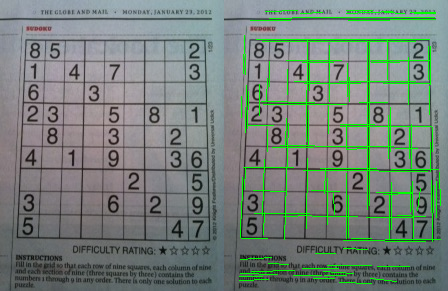

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

# 영상 읽기
img = cv2.imread('../img/sudoku.jpg')

# 트랙바를 위한 윈도우 생성
cv2.namedWindow('Trackbars')
cv2.createTrackbar('Threshold', 'Trackbars', 10, 200, nothing)
cv2.createTrackbar('Min Line Length', 'Trackbars', 20, 100, nothing)
cv2.createTrackbar('Max Line Gap', 'Trackbars', 2, 50, nothing)

while True:
    img2 = img.copy()

    # 트랙바로부터 인자 값 가져오기
    threshold_value = cv2.getTrackbarPos('Threshold', 'Trackbars')
    min_line_length = cv2.getTrackbarPos('Min Line Length', 'Trackbars')
    max_line_gap = cv2.getTrackbarPos('Max Line Gap', 'Trackbars')

    # 그레이 스케일로 변환 및 엣지 검출
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgray, 50, 200)

    # 확률적 허프 변환 적용
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold_value, None, min_line_length, max_line_gap)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

    # 결과 출력
    merged = np.hstack((img, img2))
    cv2.imshow('Probability Hough Line', merged)

    # ESC를 누르면 종료
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


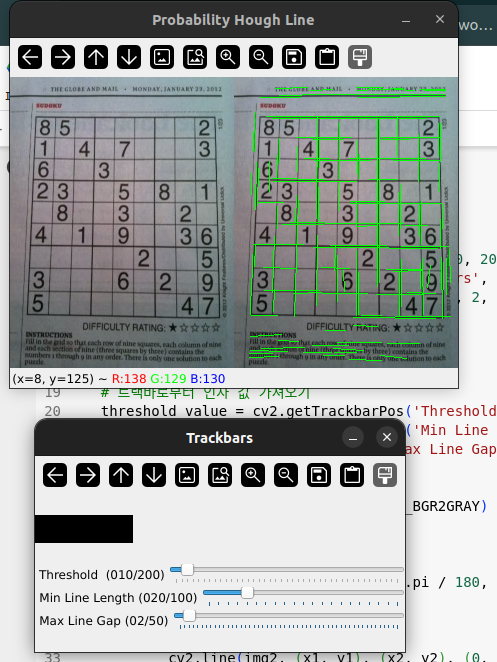

##트랙바 예제

In [ ]:
!python mean_shift.py

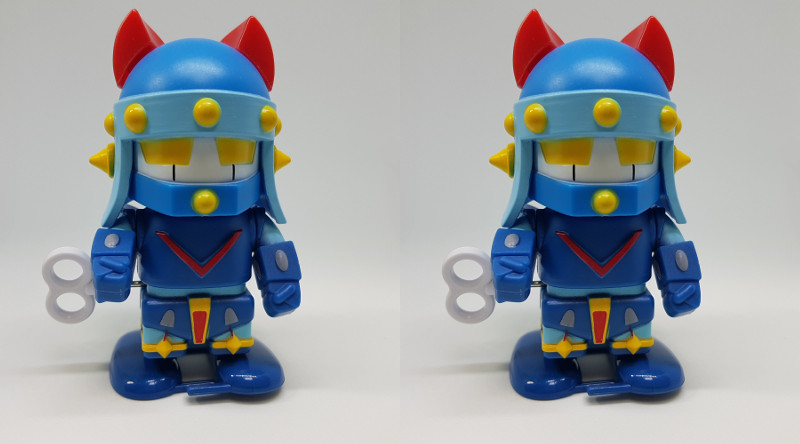

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:644: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvCreateTrackbar2'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
# 트랙바 이벤트 처리 함수
def onChange(x):
    #sp, sr, level 선택 값 수집
    sp = cv2.getTrackbarPos('sp', 'img')
    sr = cv2.getTrackbarPos('sr', 'img')
    lv = cv2.getTrackbarPos('lv', 'img')

    # 평균 이동 필터 적용 ---①
    mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    # 변환 이미지 출력
    cv2.imshow('img', np.hstack((img, mean)))

# 초기 화면 출력
#cv2.imshow('img', np.hstack((img, img)))
cv2_imshow(np.hstack((img, img)))
# 트랙바 이벤트 함수 연결
cv2.createTrackbar('sp', 'img', 0,100, onChange)
cv2.createTrackbar('sr', 'img', 0,100, onChange)
cv2.createTrackbar('lv', 'img', 0,5, onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()

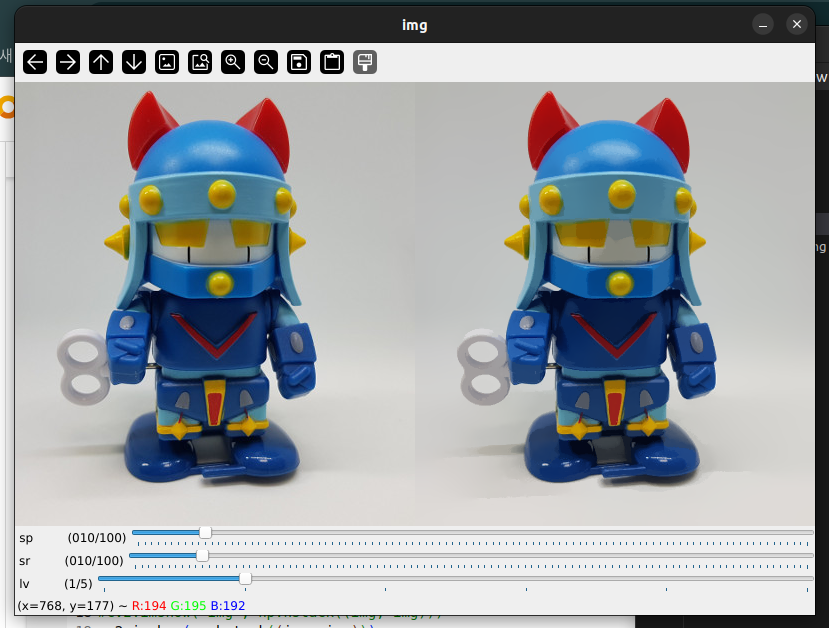